# Linear Systems in $\mathbb{R}^2$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [7]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

A linear system in $\mathbb{R}^2$ is a system of the form

$$
    \dot{\bf x} = {\bf A}{\bf x}
$$

1. If ${\bf x}_1$, ${\bf x}_2$ are solutions, then $\alpha {\bf x}_1 + \beta{\bf x}_2$; $\alpha, \beta \in\mathbb{R}$ is also a solution
2. There exists a fixed point ${\bf x}^* = 0$ for any choice of ${\bf A}$
3. We can determine the nature of the fixed point ${\bf x}^*$ from the eigenvalues of ${\bf A}$

### Example
Consider the system in $\mathbb{R}^2$ with

$$
    A = \begin{bmatrix}
    a & 0 \\
    0 & -1
    \end{bmatrix}
$$

In [8]:
def simple_dynamics(a, X):
    """
    Return the changes in the system Ax given
    by the matrix
               A =  | a 0 |
                    | 0 1 |
    """
    A = np.array([[a, 0], [0, -1]])
    X_dot = np.einsum("nm,mij->mij", A, X)
    return X_dot

vmin, vmax, step = -2.01, 2.01, 0.1
# The mpl streamplot requires the values of x to be equal
X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]

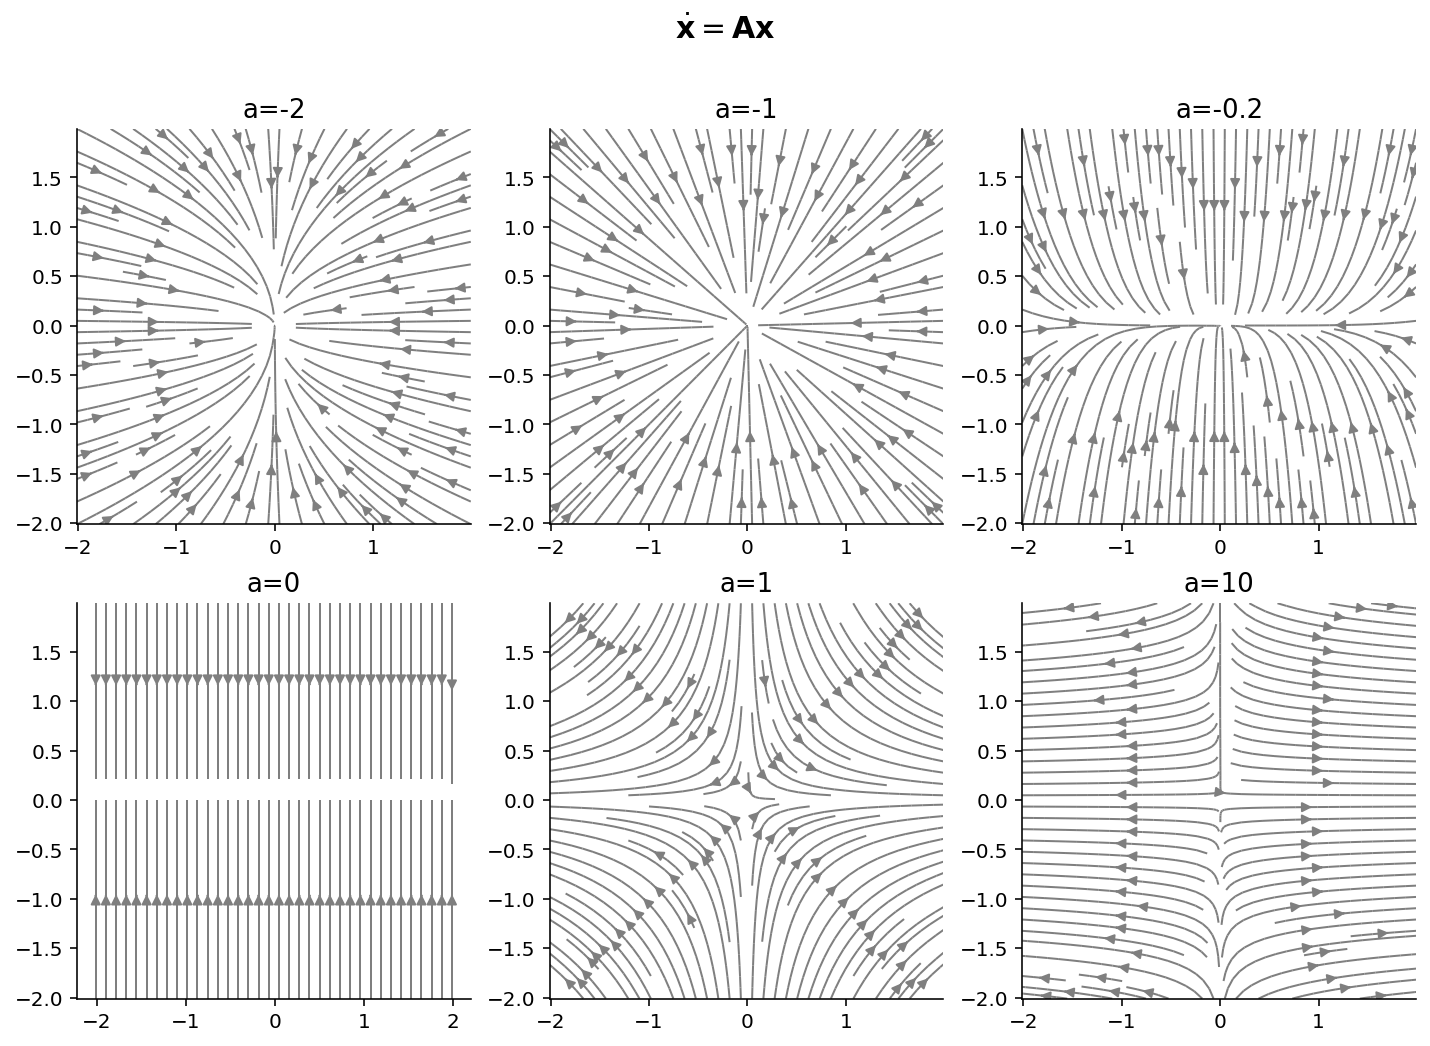

In [9]:
a = [-2, -1, -0.2, 0, 1, 10]
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.ravel()

for axi, ai in zip(ax, a):
    X_dot = simple_dynamics(a=ai, X=X)
    axi.streamplot(*X, *X_dot, color="tab:gray", linewidth=1, density=1.2)
    axi.set_title(rf"a={ai}", fontsize=13)
plt.suptitle(r"$\dot {\bf x} = {\bf Ax}$", fontsize=15);

## Classification of linear systems

In [10]:
@interact(l1=FloatSlider(min=-2, max=2, step=0.1, value=0, continuous_update=False),
          l2=FloatSlider(min=-2, max=2, step=0.1, value=0, continuous_update=False))
def stream(l1, l2):
    uv_init = np.mgrid[-2:2:.3, -2:2:.3]
    uv_init = uv_init.reshape(2, -1).T
    t = np.linspace(0, 0.5, 200)

    for u0, v0 in uv_init:
        ut = u0 * np.exp(l1 * t)
        vt = v0 * np.exp(l2 * t)
        plt.plot(ut, vt, c="tab:gray", alpha=0.3)
        plt.arrow(v0, u0, v0 * l1 / 10, u0 * l2 / 10, head_width=0.07, color="tab:blue", alpha=0.7)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='l1', max=2.0, min=-2.0), Fl…